In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

%matplotlib inline

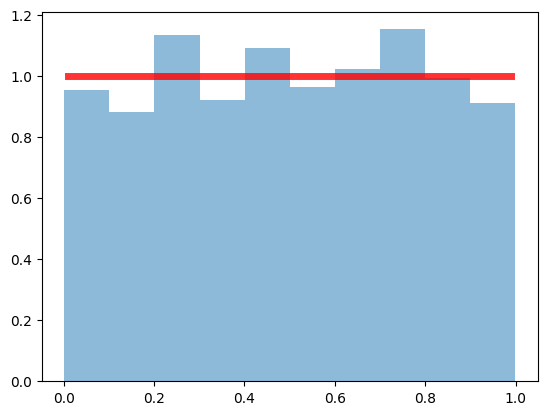

In [4]:
# 生成样本
fig, ax = plt.subplots(1, 1)
r = uniform.rvs(loc=0, scale=1, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.5)

# 均匀分布概率密度函数 pdf
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.8, label='uniform pdf')

In [7]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1])
mean = np.mean(x)
var = np.var(x) # 默认总体
var_unbias = np.var(x, ddof=1) # 样本方差（无偏方差）
cov = np.cov(x, y)
mean, var, var_unbias, cov

(5.0,
 6.666666666666667,
 7.5,
 array([[ 7.5, -7.5],
        [-7.5,  7.5]]))

In [8]:
# 伯努利分布（两点分布）
def plot_distribution(X, axes=None):
    """给定随机变量，绘制PDF(概率密度函数)、PMF(概率质量函数)和CDF(累计分布函数)"""
    if axes is None:
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    x_min, x_max = X.interval(0.99)
    x = np.linspace(x_min, x_max, 1000)

    # 判断有没有pdf，即是不是连续分布
    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x, X.pdf(x), label='PDF')
        axes[0].fill_between(x, X.pdf(x), alpha=0.5)
    else: # 离散分布
        x_int = np.unique(x.astype(int))
        axes[0].bar(x_int, X.pmf(x_int), label="PMF") # pmf 和 pdf 是类似的
    axes[1].plot(x, X.cdf(x), label="CDF")

    for ax in axes:
        ax.legend()
    return axes

array([<Axes: >, <Axes: >], dtype=object)

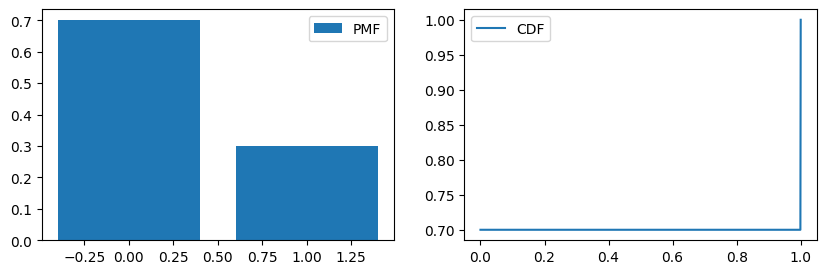

In [9]:
from scipy.stats import bernoulli
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) # 画布
p = 0.3
X = bernoulli(p) # 伯努利分布
plot_distribution(X, axes=axes)

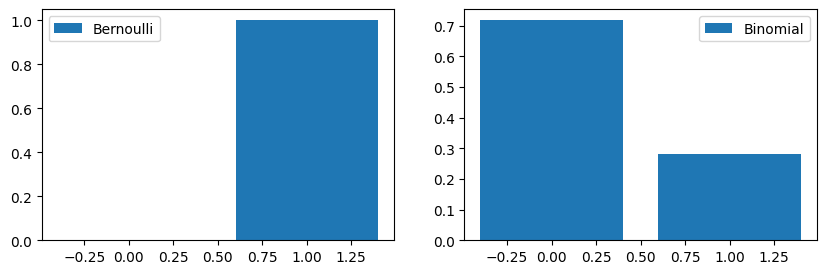

In [10]:
 # 产生成功的概率
possibility = 0.3
def trials(n_samples):
    samples = np.random.binomial(n_samples, possibility) # 成功的次数
    proba_zero = (n_samples - samples) / n_samples
    proba_one = samples / n_samples
    return [proba_zero, proba_one]

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# 一次试验， 伯努利分布
n_samples = 1
axes[0].bar([0, 1], trials(n_samples), label="Bernoulli")

# n 次试验， 二项分布
n_samples = 1000
axes[1].bar([0, 1], trials(n_samples), label="Binomial")

for ax in axes:
    ax.legend()